# Statistics for Engineers

Tuorial at SRECon 2015

by Heinrich Hartmann (<heinrich.hartmann@circonus.com> / Twitter: [@HeinrichHartman](http://twitter.com/HeinrichHartman))

## Heinrich Hartmann

* Twitter: [@HeinrichHartman](https://twitter.com/HeinrichHartman)
* Blog: [HeinrichHartmann.com](https://heinrichhartmann.com)

### Bio

* Phd in pure Mathematics (Mainz, Bonn, Oxford)

* Postdoc in IT (Koblenz)

* Freelance Consultant

* Data Scientist at Circonus.com

<img src="img/Circonus_Logo.png" style="margin-right:auto; margin-left:auto">

<img src="img/me.jpg" width="200px" style="margin-right:auto; margin-left:auto">

# Slides, Code and Data

Twitter: @HeinrichHartman

[TODO] Embed proper tweet.

<blockquote class="twitter-tweet" lang="en"><p lang="en" dir="ltr">Automated anomaly detection: A whole new way to monitor. Live at Booth 217. <a href="https://twitter.com/hashtag/chefconf?src=hash">#chefconf</a> <a href="https://twitter.com/ChefConf">@chefconf</a> <a href="https://twitter.com/circonus">@circonus</a> <a href="http://t.co/nOJrP6z1S5">pic.twitter.com/nOJrP6z1S5</a></p>&mdash; Circonus (@circonus) <a href="https://twitter.com/circonus/status/583724394222133249">April 2, 2015</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

GitHub: https://github.com/HeinrichHartmann/

# Outline

1. Summarizing Data

2. Probability Theory and Statistics

3. Hands on Session

4. Time Series Analysis and Forecasting

# Learning Goals / Problem Statements

* Check SLA: 95% Uptime.
  - Quantiles
  - Mean values
  - Means of mean values

* A/B Testing. Compare response time before and after code change.

* Discover correlations in data:
  - scatterplots

* Handle system data on the command line
  - csv files
  - UNIX tools
  - Live Plotting
  
* Sampling Errors
  - Difference between raw and rolled up data
  - Multiple roll ups

# Summarizing Data

Given a set of numbers $x_1, \dots, x_n$ how can we understand / visualize the data?

Example sources:

* API latencies
* CPU utilization
* Network throughput

Example summaries:

* How many points are there?
* What are typical values?
* How large is the spread of the data?
* Is the data evenly distributed or clustered?
* Are there outliers?

### Ordered data

* Example: Request rate over time
* Visualize using time series plot
* More on time series in Part 3

In [266]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,4)
sns.set_palette("deep", desat=.6)

np.random.seed(9221999)

import seaborn as sns

x= [ 789.73950195  778.48028564  820.66223145] ...
n= 76


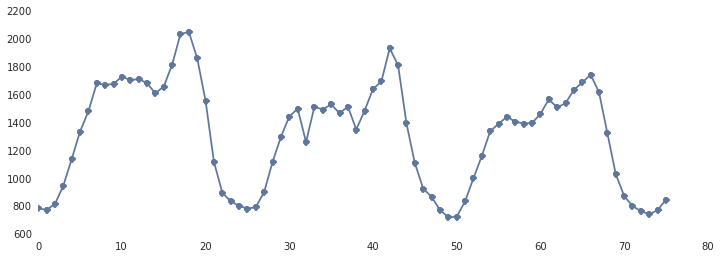

In [267]:
x = np.loadtxt("DataSets/trap-metrics.csv", delimiter=",")[:,1]
print "x=", x[:3], '...'
print "n=", len(x)
plt.plot(x,'o-');

# Unordered data

* Forget about time dependence
* Requests to website (e.g. log files)


Visualization Method:
1. Rug Plot
2. Histograms
3. Kernel density estimation

## Rug Plots

* Plot a vertical line 'rug' for each data point

* Simple and accurate representation of data

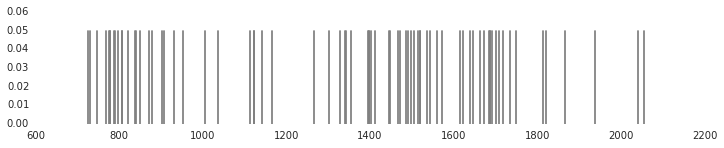

In [268]:
plt.figure(figsize=(12,2))
sns.rugplot(x, color="grey");

### From Time Series to Rug Plots
1. Project point to y-axis
2. Rotate

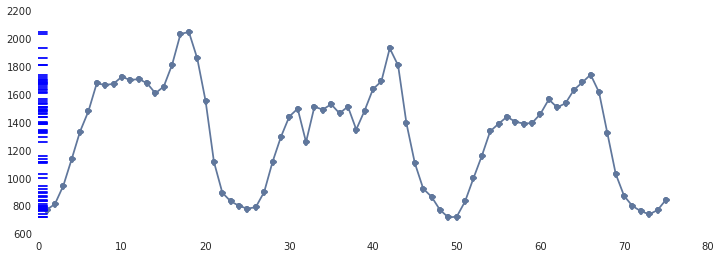

In [271]:
plt.plot(x,'o-')
sns.rugplot(x,axis='y', height=1, color="blue");

### Rug plot for discrete values is problematic

* Multiple values not visible.

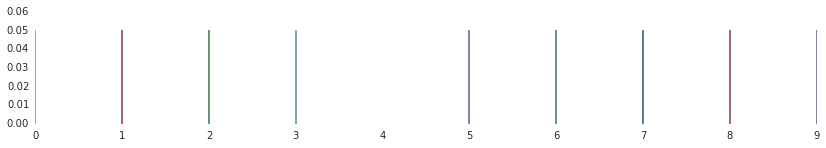

In [284]:
x2 = [1, 2, 1, 6, 0, 8, 0, 6, 5, 5, 9, 5, 7, 2, 9, 5, 0, 8, 8, 8, 8, 9, 3, 3 ] * 3

plt.figure(figsize=(14,2))
sns.rugplot(x2);

### Jitter Trick

* Perturb each value by a random displacement.
* The displacement needs to be small in comparison to the distance between values.
* Can also use vertical displacement.

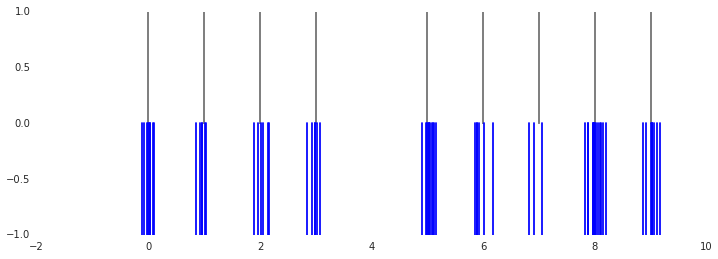

In [306]:
jitter = lambda x: [ v + 0.1 * np.random.normal() for v in x]

sns.rugplot(x2, height=1, color='grey');
sns.rugplot(jitter(x2), height=-1, color='blue');

## Histogram Visualization of Unordered Data

1. Divide data domain into bins.

2. Count number of datapoints per bin.

3. Plot bar chart of bin frequencies.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] -- represent intervals [i,i+1)
[9, 6, 6, 6, 0, 12, 6, 3, 15, 9, 0]  -- sample counts per bin


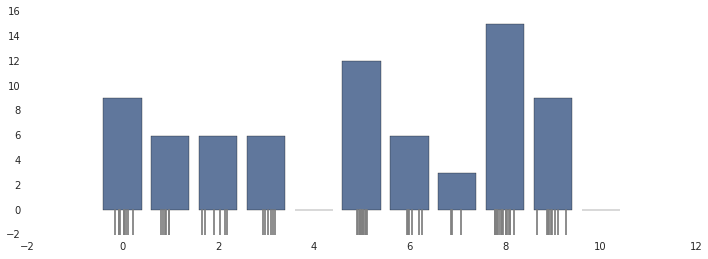

In [309]:
X = x2
bins = range(11)
print bins, "-- represent intervals [i,i+1)"

def findBin(x, bins):
    if x < bins[0]: return None
    if x >= bins[-1] + 1: return None
    for b in bins:
        if x < b: return b - 1

count = [0] * len(bins)
for x in X:
    count[findBin(x, bins)] += 1
    
print count, " -- sample counts per bin"

plt.bar(bins,count, align='center')
sns.rugplot(jitter(x2), height=-2, color='grey');

# Built in version: plt.hist(x2, bins=range(-1,11), align='left')

## Pros and Cons

* Easier to read then rug-plot
* Need to choose bins: size and alignment.
* Choice of bins has impact on visual appearance!

TODO: Examples of Differences.


## Mean Value

The _mean value_ of $x_1, \dots, x_n$ is defined as

$$ \mu = mean(x_1, \dots, x_n) = \frac{1}{n} \sum_{i=1}^n x_i. $$

* If the values are close together this is a good representative

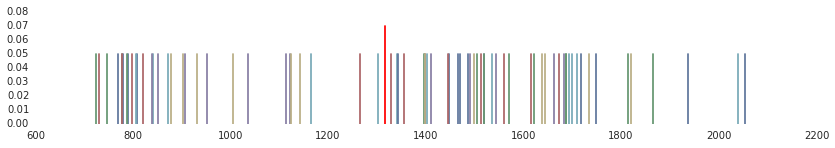

In [311]:
x = request_rate
mean = lambda x: sum(x) / len(x)
m = mean(x)

plt.figure(figsize=(14,2))
sns.rugplot(x);
plt.plot([m,m],[0,0.07],'r-' );

The _standard deviation_ is defined as


$$ \sigma = stddev(x_1,\dots,x_n) = \frac{1}{n} \sqrt{\sum_{i=1}^n (x_i - \mu)^2}. $$

* Measures the 'typical' displacement from the mean value.
* Popularized C.F. Gauss because it has nice mathematical properties.
* Alternatives: $p$-norms, mean-absolute derivation, max-deviation.


### Digression: p-norms

$$ \sigma_p=dev_p(x_1,\dots,x_n) =  \frac{1}{n} (\sum_{i=1}^n |x_i - \mu|^p)^{1/p}, \quad 1 \leq p \leq \infty $$

* So $\sigma_2 = \sigma$ stddev.
* $\sigma_1$ is the mean absolute deviation
* $\sigma_\infty$ is the normalized max-deviation

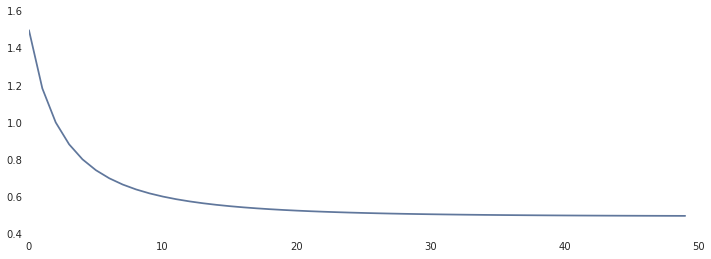

In [369]:
from IPython.display import display
from IPython.html.widgets import FloatSlider
from IPython.html.widgets import interactive
import math
def prt(x): print x

X=[1,2,3,4,5,6]
def pdev(X, p=2):
    m = mean(X)
    return 1. / len(X) * math.pow(sum( math.pow(abs(x - m),p) for x in X), 1./p) 

#F1 = FloatSlider(value=2, min=1, max=10)
#w=interactive(lambda p: prt(pdev(X,p)), p=F1)
#display(w)

plt.plot([pdev(X,p) for p in np.linspace(1,10,50)])
plt.figure(


In [341]:
pdev(1)

3
0.0
